In [1]:
import tifffile
import numpy as np
from stl import mesh

img = tifffile.imread("./viet/V2_2_105.75_15.98.tif")
img = img.reshape(img.shape[0], img.shape[1], 1)

In [2]:
img.shape

(418, 195, 1)

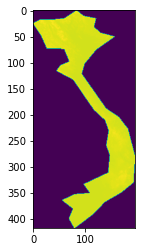

In [3]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [4]:
import numpy
from stl import mesh
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

# Using an existing stl file:
your_mesh = mesh.Mesh.from_file('./viet/V2_2_105.75_15.98_tile_1_1.stl')
your_mesh.vectors.shape


(92064, 3, 3)

In [5]:
your_mesh.vectors

array([[[  0.41025642, 161.64102   ,   5.4365387 ],
        [  0.        , 161.23077   ,   5.9026113 ],
        [  0.41025642, 161.23077   ,   6.0191293 ]],

       [[  0.41025642, 161.64102   ,   0.        ],
        [  0.41025642, 161.23077   ,   0.        ],
        [  0.        , 161.23077   ,   0.        ]],

       [[  0.        , 161.23077   ,   5.9026113 ],
        [  0.41025642, 161.64102   ,   5.4365387 ],
        [  0.41025642, 161.64102   ,   0.        ]],

       ...,

       [[ 79.589745  ,  50.05128   ,   0.        ],
        [ 79.589745  ,  50.46154   ,   0.        ],
        [ 80.        ,  50.46154   ,   0.        ]],

       [[ 80.        ,  50.46154   ,   2.3008733 ],
        [ 79.589745  ,  50.05128   ,   2.881989  ],
        [ 79.589745  ,  50.05128   ,   0.        ]],

       [[ 80.        ,  50.46154   ,   2.3008733 ],
        [ 79.589745  ,  50.05128   ,   0.        ],
        [ 80.        ,  50.46154   ,   0.        ]]], dtype=float32)

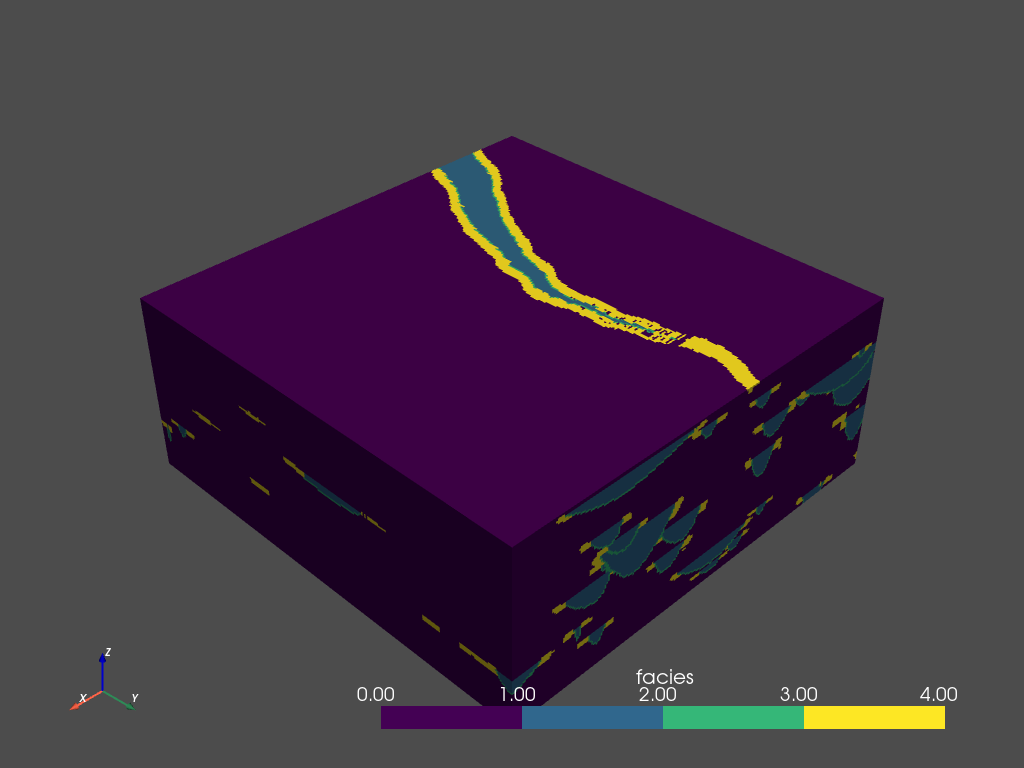

[(534.8076211353316, 534.8076211353316, 459.80762113533166),
 (125.0, 125.0, 50.0),
 (0.0, 0.0, 1.0)]

In [6]:
import pyvista as pv
from pyvista import examples
import matplotlib.pyplot as plt
import numpy as np

mesh = examples.load_channels()
# define a categorical colormap
cmap = plt.cm.get_cmap("viridis", 4)


mesh.plot(cmap=cmap)

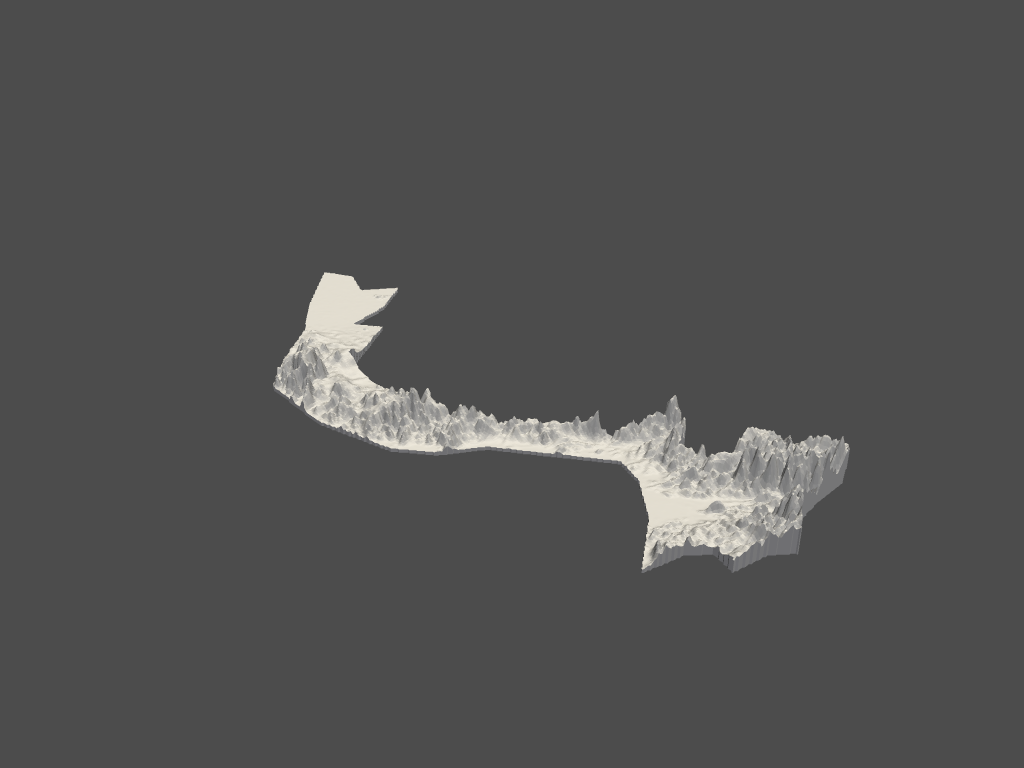

[(251.67317482796756, 297.4167661365613, 218.90099093285647),
 (40.0, 85.74359130859375, 7.227816104888916),
 (0.0, 0.0, 1.0)]

In [7]:
import pyvistaqt as pvqt

# p = pvqt.BackgroundPlotter()
p = pv.Plotter()

viet_mesh = pv.read('./viet/V2_2_105.75_15.98_tile_1_1.stl')
# p = pv.Plotter(notebook=True)

p.add_mesh(viet_mesh)
p.show()
# viet_mesh.plot(show_edges=True, lighting=False)

[0.0, 80.0, -1.4432899320127035e-15, 171.4871826171875, 0.0, 14.455632209777832]
[40.0, 85.74359130859375, 7.227816104888916]


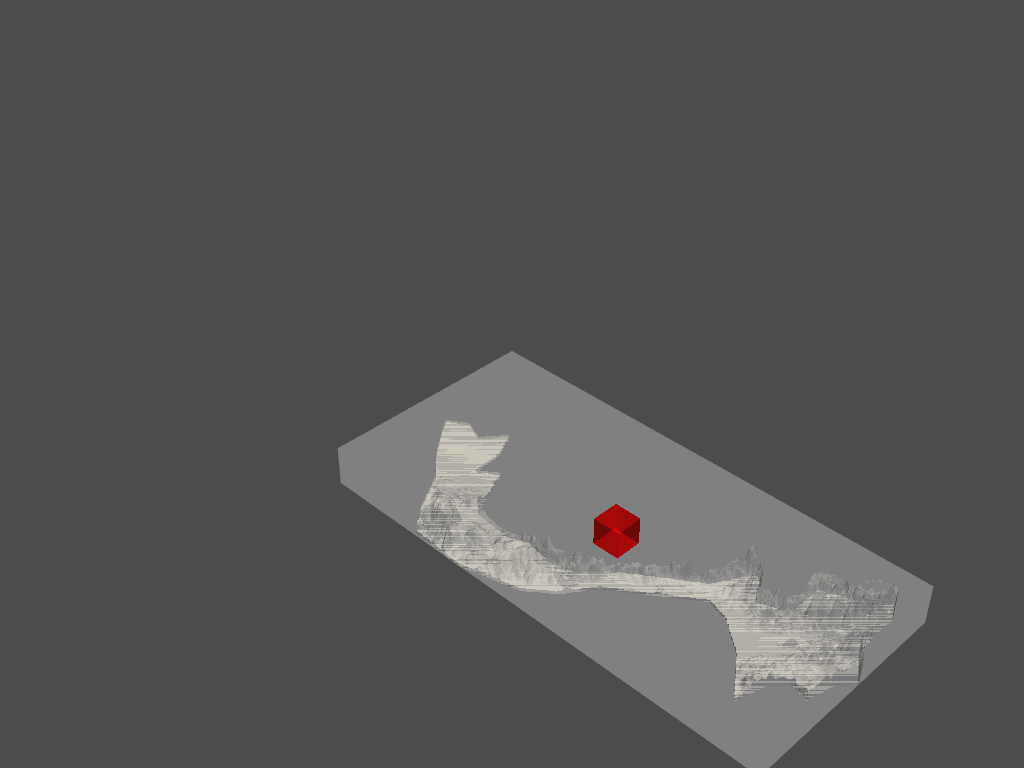

[(300.0, 300.0, 300.0),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [8]:

roi = pv.Cube(center=viet_mesh.center, x_length=10, y_length=10, z_length=10)
print(viet_mesh.bounds)
print(viet_mesh.center)

cpos = [(300,300,300),
 (0,0,0),
 (0, 0, 1)]


p = pv.Plotter()
p.add_mesh(viet_mesh, opacity=0.5)
p.add_mesh(roi, opacity=0.75, color="red")
p.add_floor('-x')
p.add_floor('-y')
p.add_floor('-z')

p.show(cpos=cpos)

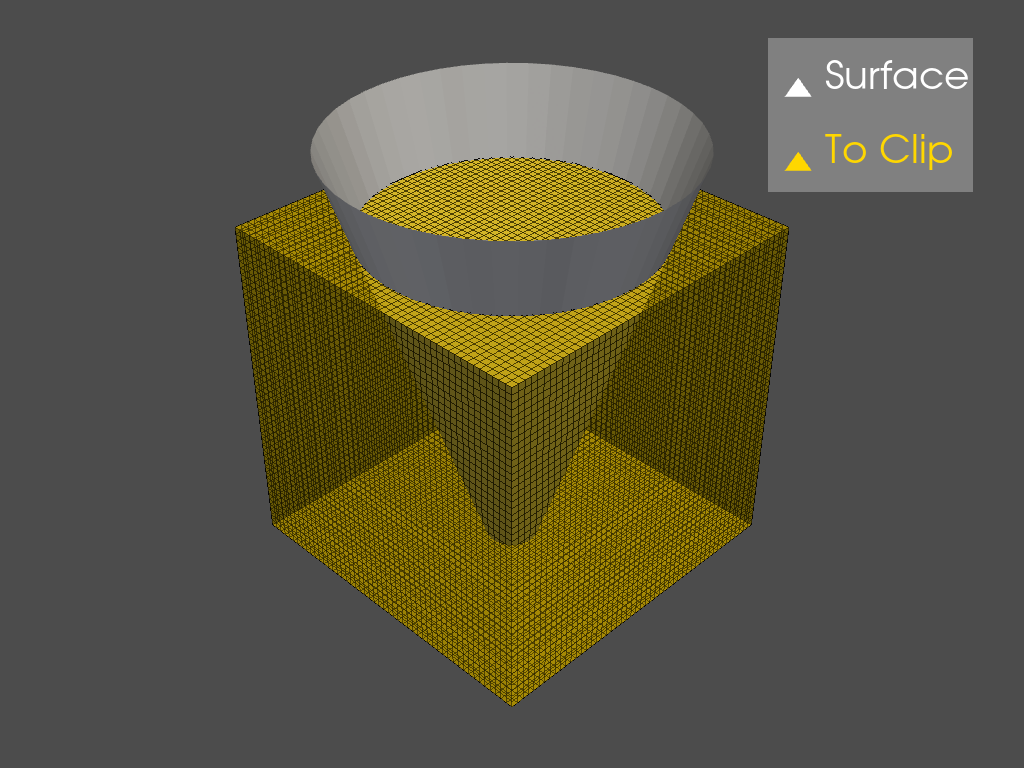

[(4.622235903444128, 4.622235903444128, 4.642235903444129),
 (-0.020000000000000018, -0.020000000000000018, 0.0),
 (0.0, 0.0, 1.0)]

In [9]:
surface = pv.Cone(direction=(0,0,-1), height=3.0, radius=1,
                  resolution=50, capping=False)

# Make a gridded dataset
n = 51
xx = yy = zz = 1 - np.linspace(0, n, n) * 2 / (n-1)
dataset = pv.RectilinearGrid(xx, yy, zz)

# Preview the problem
p = pv.Plotter()
p.add_mesh(surface, color='w', label='Surface')
p.add_mesh(dataset, color='gold', show_edges=True,
           opacity=0.75, label='To Clip')
p.add_legend()
p.show()

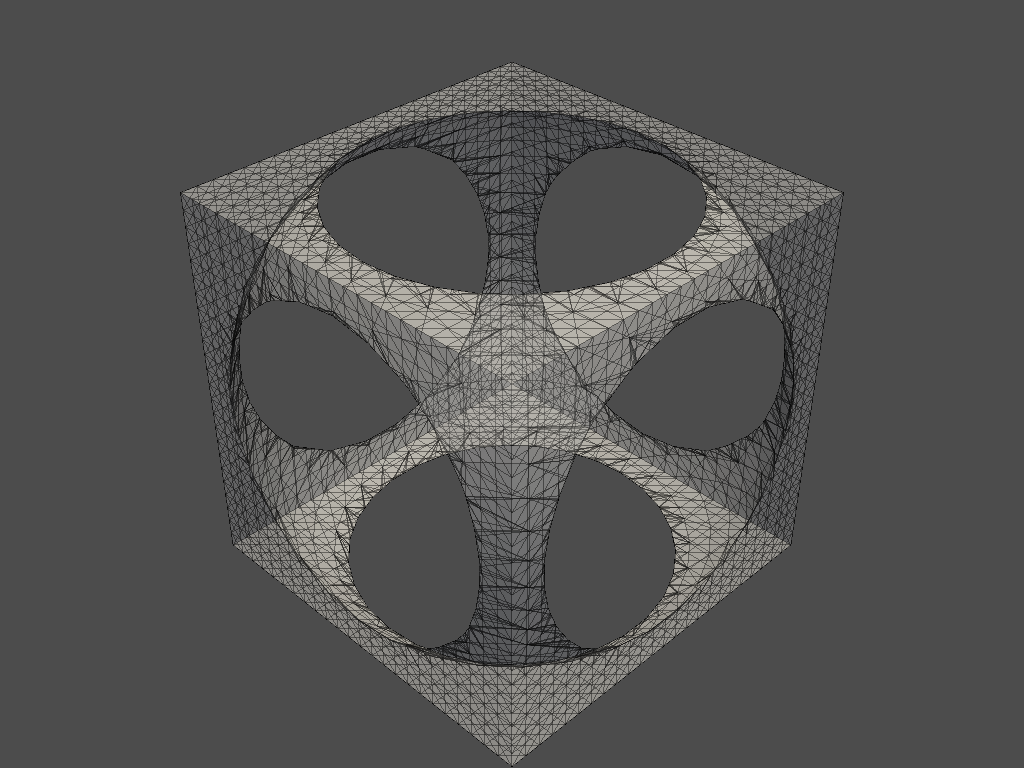

[(1.9318516525781368, 1.9318516525781368, 1.9318516525781368),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [10]:
def make_cube():
    x = np.linspace(-0.5, 0.5, 25)
    grid = pv.StructuredGrid(*np.meshgrid(x, x, x))
    return grid.extract_surface().triangulate()

# Create to examplee PolyData meshes for boolean operations
sphere = pv.Sphere(radius=0.65, center=(0, 0, 0))
cube = make_cube()

union = sphere.boolean_union(cube)

p = pv.Plotter()
p.add_mesh(union,  opacity=0.5, show_edges=True, color=True)
p.show()

In [11]:
viet_mesh.bounds

[0.0,
 80.0,
 -1.4432899320127035e-15,
 171.4871826171875,
 0.0,
 14.455632209777832]

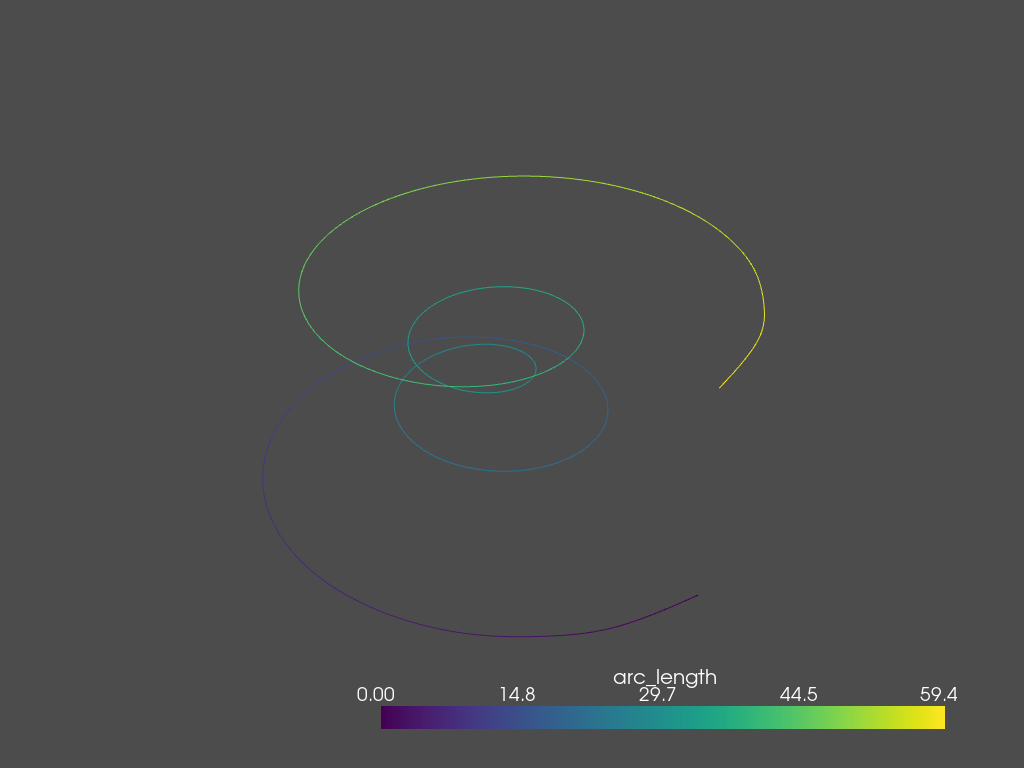

[(13.746505245831655, 14.60405312505071, 13.746505245831655),
 (0.0, 0.8575478792190552, 0.0),
 (0.0, 0.0, 1.0)]

In [12]:
import numpy as np
import pyvista as pv
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
points = np.column_stack((x, y, z))
spline = pv.Spline(points, 1000)
p = pv.Plotter()
p.add_mesh(spline)
p.show()

In [13]:
pv.Report()

--------------------------------------------------------------------------------
  Date: Wed Jan 13 00:18:15 2021 PST

                OS : Darwin
            CPU(s) : 8
           Machine : x86_64
      Architecture : 64bit
       Environment : Jupyter
        GPU Vendor : Intel Inc.
      GPU Renderer : Intel(R) Iris(TM) Plus Graphics 655
       GPU Version : 4.1 INTEL-16.1.7

  Python 3.8.6 (default, Nov 20 2020, 18:29:40)  [Clang 12.0.0
  (clang-1200.0.32.27)]

           pyvista : 0.27.4
               vtk : 9.0.1
             numpy : 1.19.5
           imageio : 2.9.0
           appdirs : 1.4.4
            scooby : 0.5.6
            meshio : 4.3.8
        matplotlib : 3.3.3
         pyvistaqt : 0.2.0
             PyQt5 : 5.15.2
           IPython : 7.19.0
             scipy : 1.6.0
--------------------------------------------------------------------------------

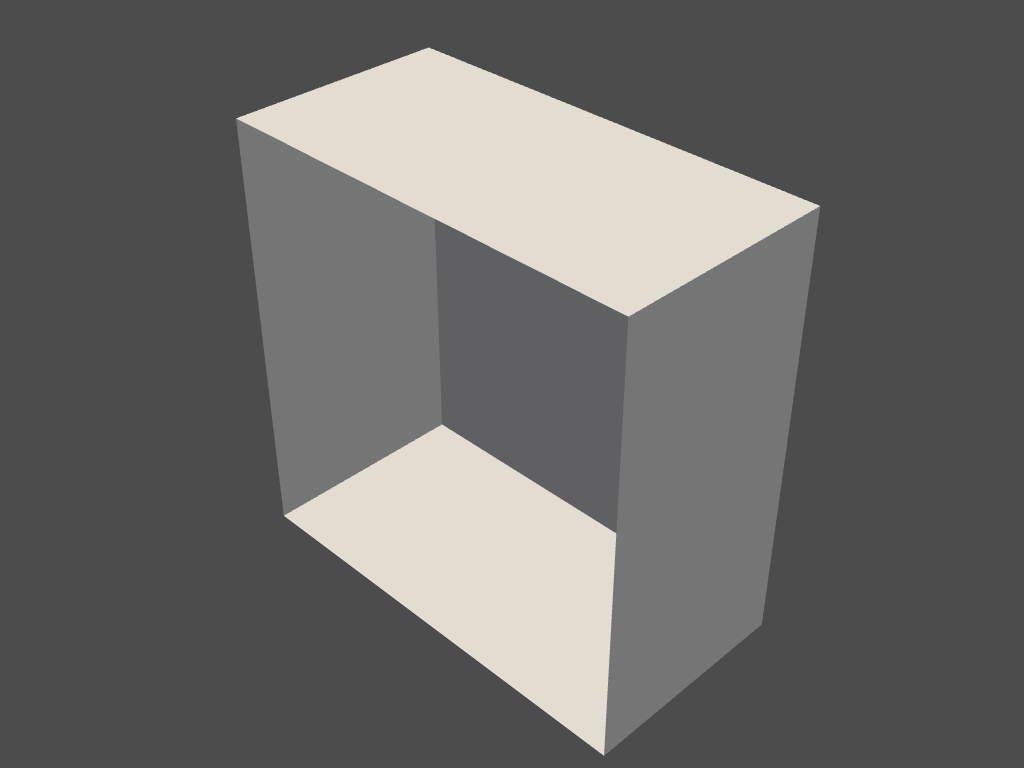

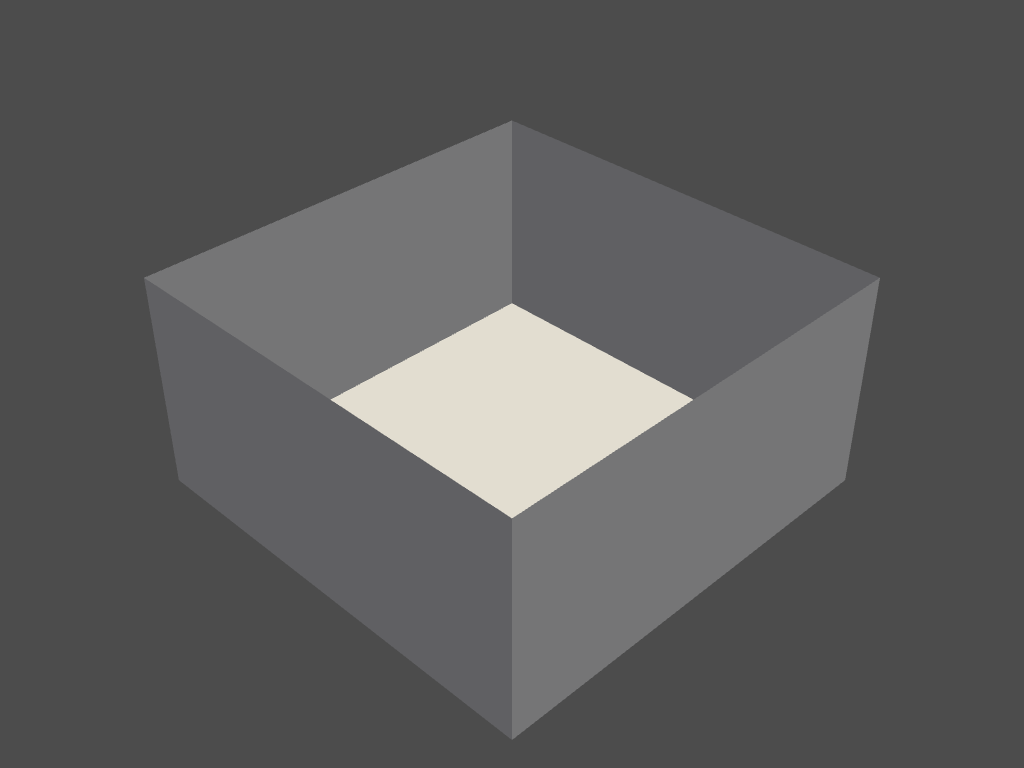

[(1.673032607475616, 1.673032607475616, 1.423032607475616),
 (0.0, 0.0, -0.25),
 (0.0, 0.0, 1.0)]

In [14]:
import pyvista as pv
cube = pv.Cube().triangulate().subdivide(3)
clipped_cube = cube.clip()
p = pv.Plotter()
p.add_mesh(clipped_cube)
p.show()

import pyvista as pv
cube = pv.Cube().triangulate().subdivide(3)
clipped_cube = cube.clip('z')
p = pv.Plotter()
p.add_mesh(clipped_cube)
p.show()

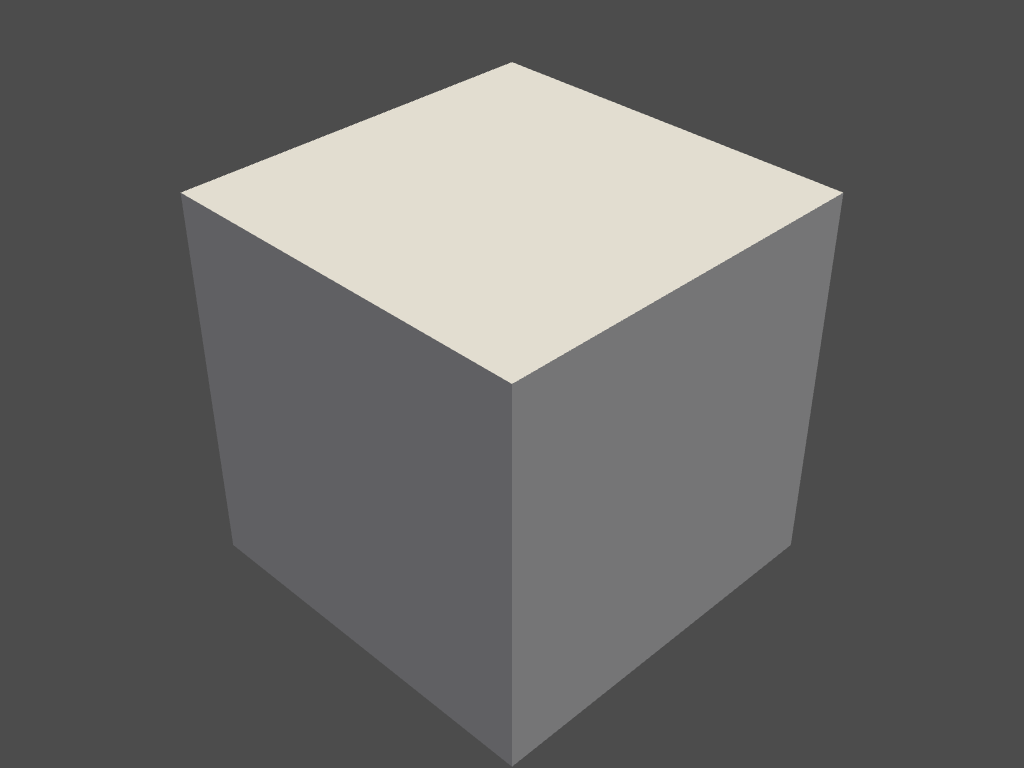

[(1.9318516525781368, 1.9318516525781368, 1.9318516525781368),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [15]:
cube = pv.Cube()

p = pv.Plotter()
p.add_mesh(cube)
p.show()

In [16]:
viet_mesh.volume

12654.843795985646

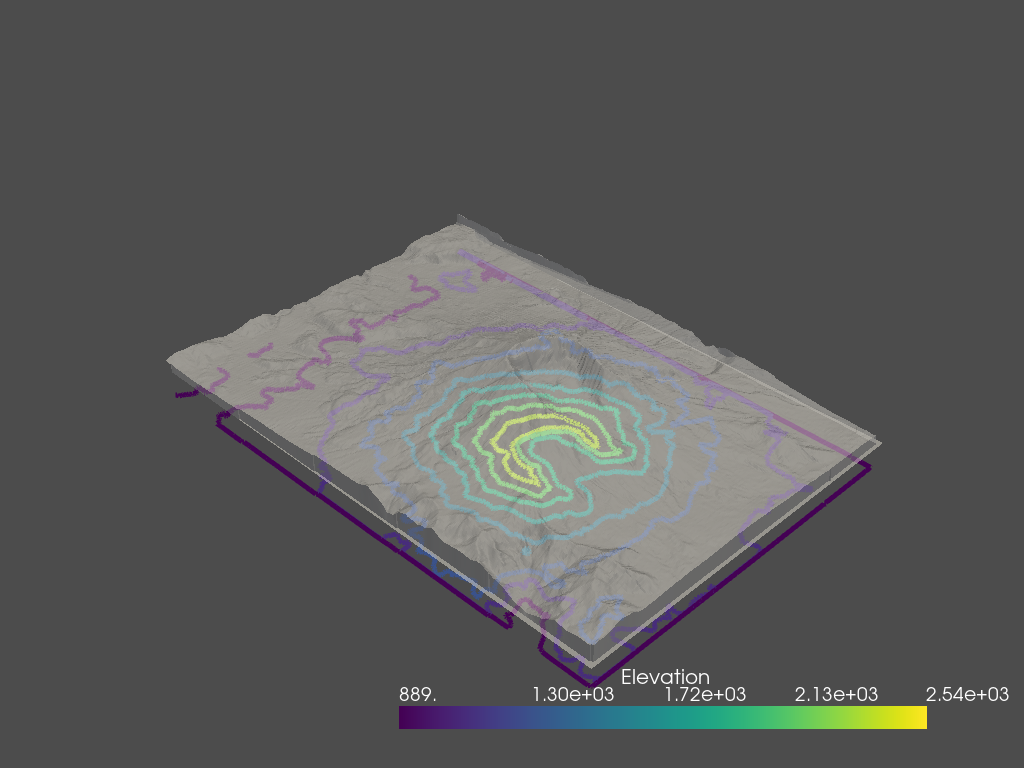

[(582074.6534978079, 5134221.153497808, 21193.15349780787),
 (562835.0, 5114981.5, 1953.5),
 (0.0, 0.0, 1.0)]

In [17]:
from pyvista import examples

# Load St Helens DEM and warp the topography
image = examples.download_st_helens()
mesh = image.warp_by_scalar()

p = pv.Plotter()
p.add_mesh(image.contour(), line_width=5,)
p.add_mesh(mesh, opacity=0.5, color=True)
p.show()

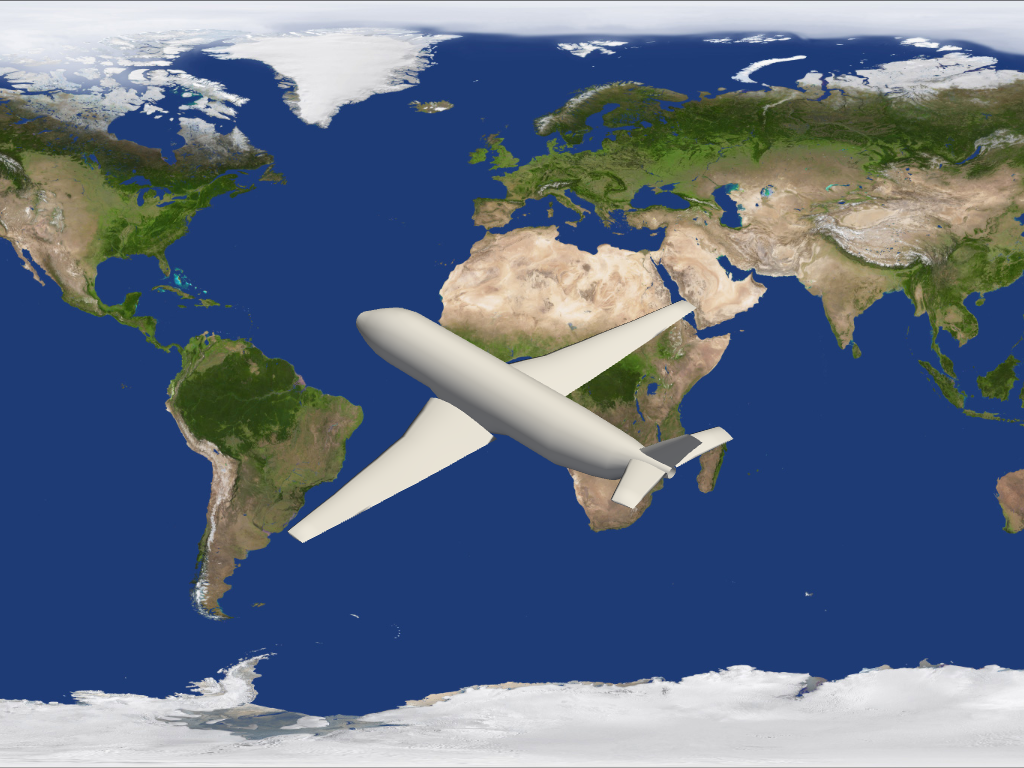

[(3140.593704331348, 2919.620300400684, 2375.7925778512454),
 (896.9955291748047, 676.0221252441406, 132.19440269470215),
 (0.0, 0.0, 1.0)]

In [18]:
earth_alt = examples.download_topo_global()

pl = pv.Plotter()
actor = pl.add_mesh(examples.load_airplane(), smooth_shading=True)
pl.add_background_image(examples.mapfile)
pl.show()

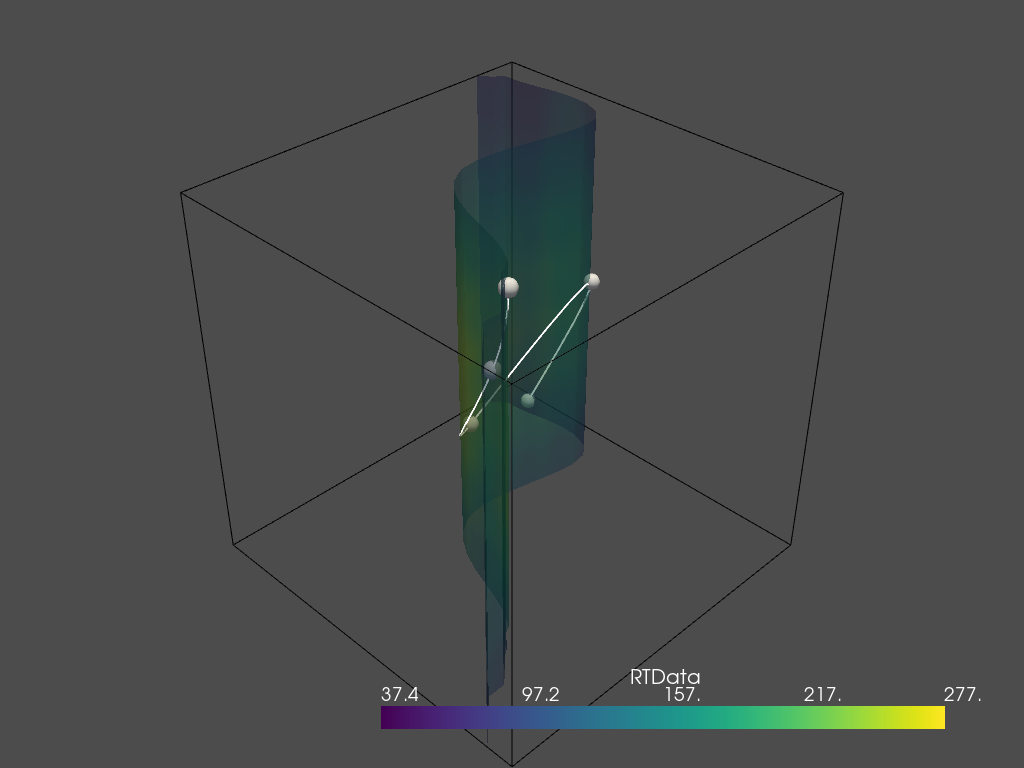

[(38.63703305156274, 38.63703305156274, 38.63703305156274),
 (0.0, 0.0, 0.0),
 (0.0, 0.0, 1.0)]

In [19]:
mesh = pv.Wavelet()

# initial spline to seed the example
points = np.array([[-8.64208925, -7.34294559, -9.13803458],
                   [-8.25601497, -2.54814702,  0.93860914],
                   [-0.30179377, -3.21555997, -4.19999019],
                   [ 3.24099167,  2.05814768,  3.39041509],
                   [ 4.39935227,  4.18804542,  8.96391132]])

p = pv.Plotter()
p.add_mesh(mesh.outline(), color='black')
p.add_mesh_slice_spline(mesh, initial_points=points, n_handles=5, opacity=0.5)
# p.camera_position = [(30, -42, 30),
#  (0.0, 0.0, 0.0),
#  (-0.09, 0.53, 0.84)]
p.show()

In [20]:
mesh

UniformGrid (0x14ec59a00)
  N Cells:	8000
  N Points:	9261
  X Bounds:	-1.000e+01, 1.000e+01
  Y Bounds:	-1.000e+01, 1.000e+01
  Z Bounds:	-1.000e+01, 1.000e+01
  Dimensions:	21, 21, 21
  Spacing:	1.000e+00, 1.000e+00, 1.000e+00
  N Arrays:	1

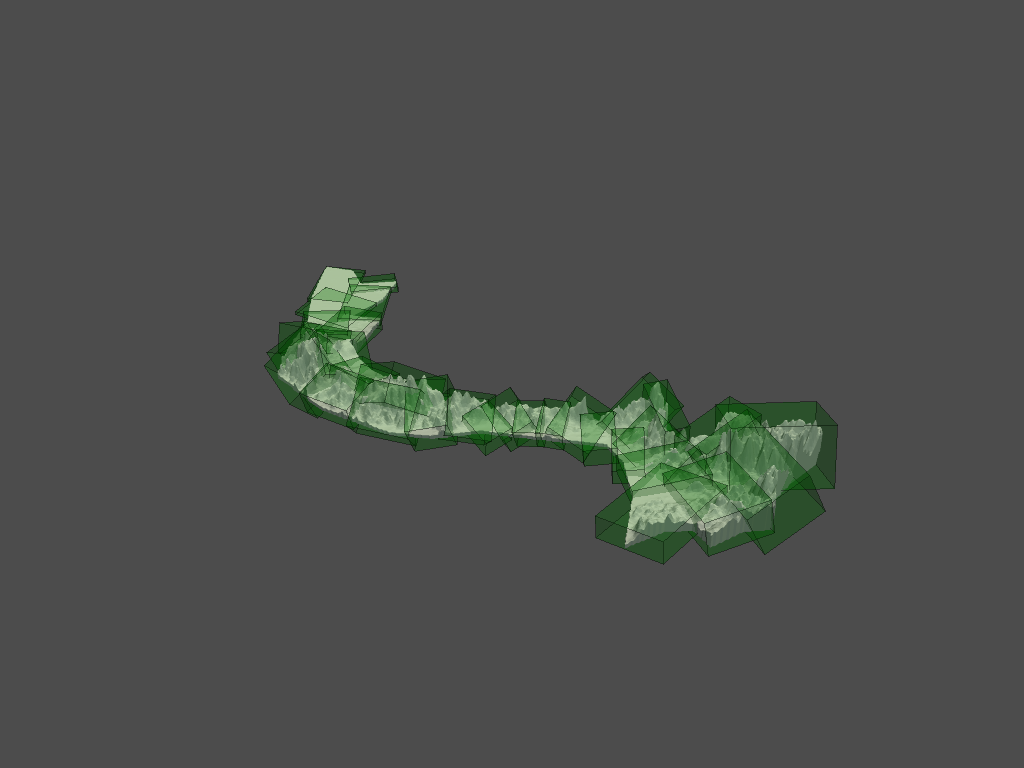

[(263.1749960038119, 311.9423594328814, 227.85582576722433),
 (39.48673701286316, 88.25410044193268, 4.167566776275635),
 (0.0, 0.0, 1.0)]

In [21]:
obb = viet_mesh.obbTree

boxes = pv.PolyData()
obb.GenerateRepresentation(5, boxes)

# p = pv.Plotter(notebook=False)
p = pv.Plotter()
p.add_mesh(boxes, show_edges=True, opacity=0.25, color="green")
p.add_mesh(viet_mesh)
p.show()

In [22]:
viet_mesh.length

189.78097666669592

In [23]:
viet_mesh.extract_surface()

PolyData (0x1404bd820)
  N Cells:	92064
  N Points:	46034
  X Bounds:	0.000e+00, 8.000e+01
  Y Bounds:	-1.443e-15, 1.715e+02
  Z Bounds:	0.000e+00, 1.446e+01
  N Arrays:	2

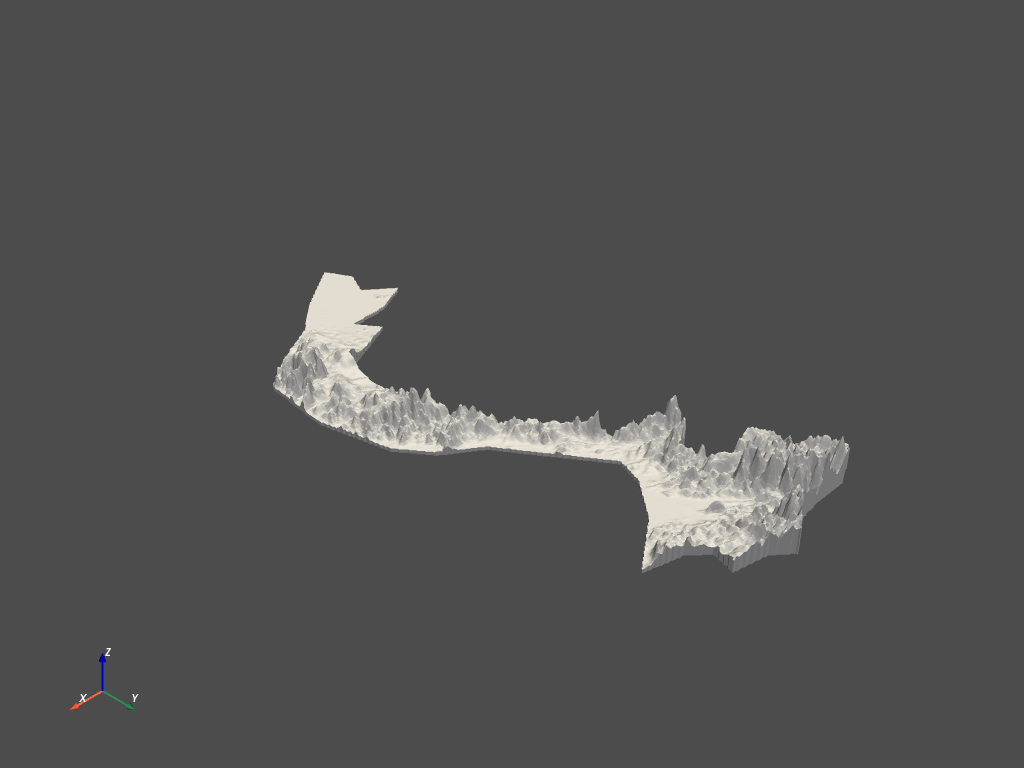

[(251.67317482796756, 297.4167661365613, 218.90099093285647),
 (40.0, 85.74359130859375, 7.227816104888916),
 (0.0, 0.0, 1.0)]

In [24]:
viet_mesh.plot()

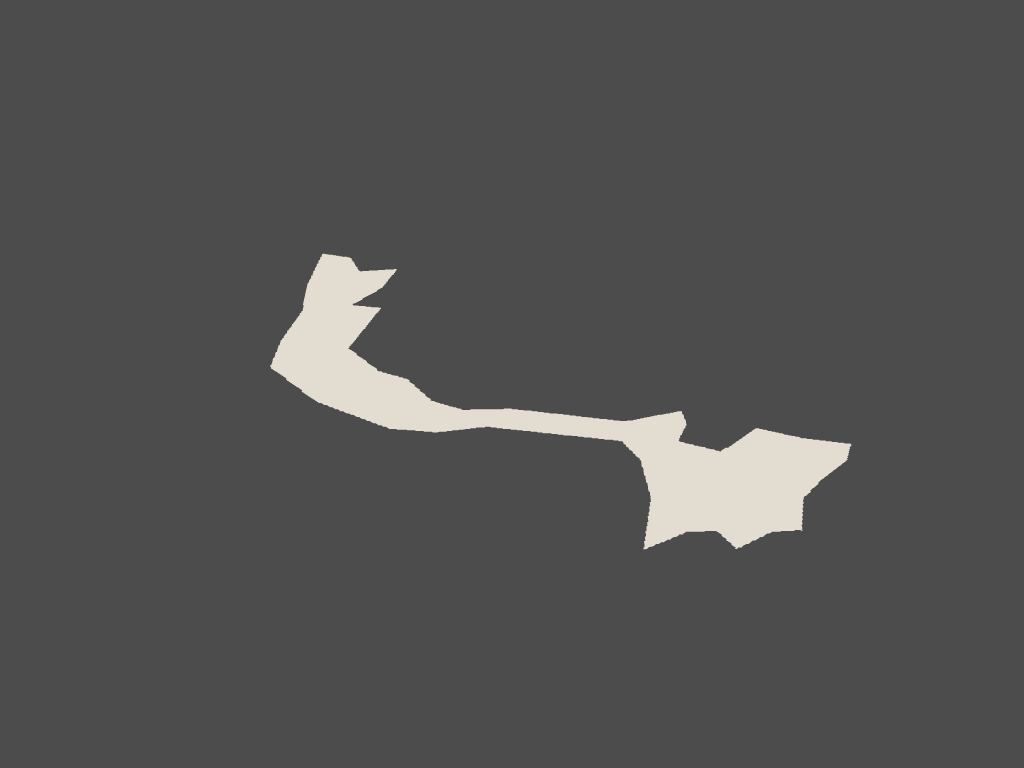

[(251.0582302738513, 296.8018215824451, 218.28604637874022),
 (40.0, 85.74359130859375, 7.227816104888916),
 (0.0, 0.0, 1.0)]

In [25]:
projected = viet_mesh.project_points_to_plane(origin=viet_mesh.center)
p = pv.Plotter()
p.add_mesh(projected)
p.show()

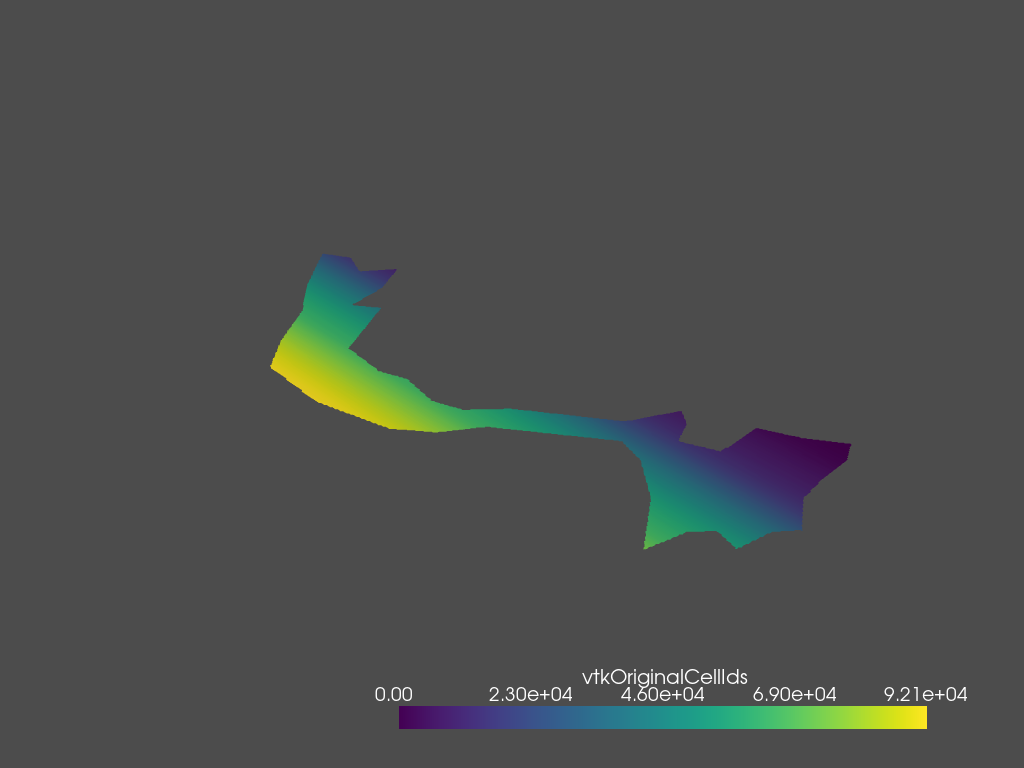

[(251.0582302738513, 296.8018215824451, 218.28604637874022),
 (40.0, 85.74359130859375, 7.227816104888916),
 (0.0, 0.0, 1.0)]

In [26]:
p = pv.Plotter()
p.add_mesh(projected.extract_surface())
p.show()


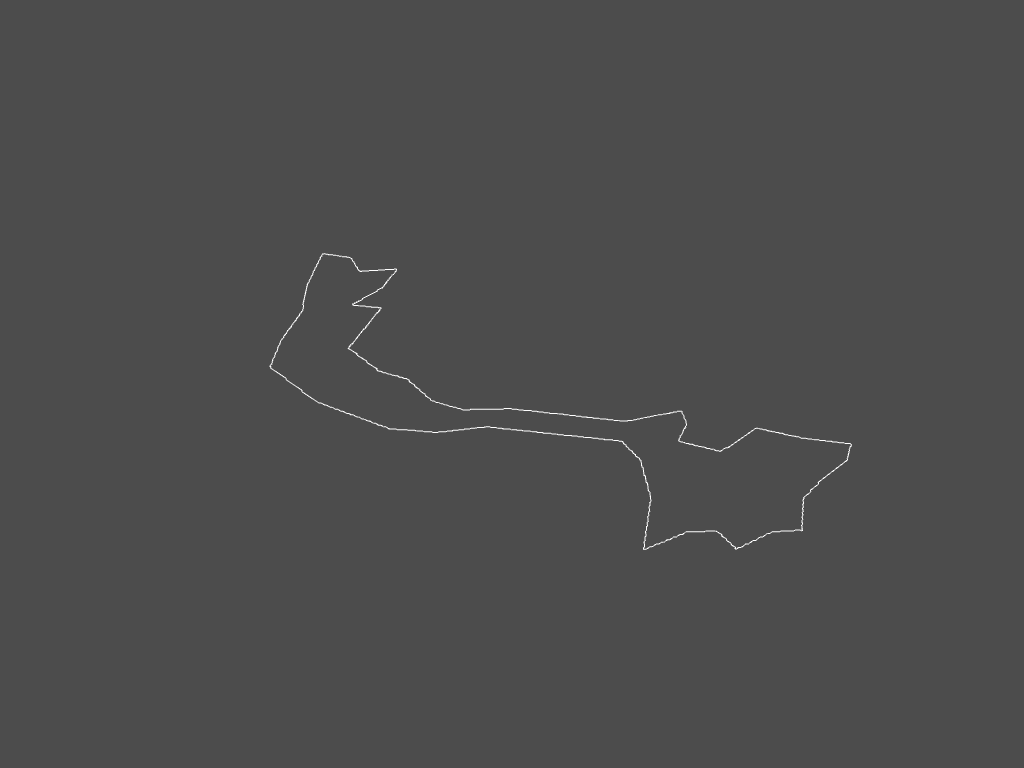

[(251.0582302738513, 296.8018215824451, 218.28604637874022),
 (40.0, 85.74359130859375, 7.227816104888916),
 (0.0, 0.0, 1.0)]

In [27]:
p = pv.Plotter()
p.add_mesh(projected.extract_feature_edges())
p.show()



In [28]:
b = np.array(projected.bounds)

((b[1]-b[0]) * (b[3]-b[2])) / projected.area

1.814478405772089

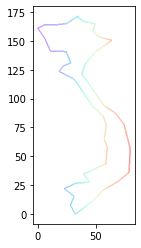

In [29]:
from vtk.util.numpy_support import vtk_to_numpy


viet_np = vtk_to_numpy(viet_mesh.project_points_to_plane(origin=viet_mesh.center).extract_feature_edges().GetPoints().GetData())

fig, ax = plt.subplots(1)
ax.scatter(viet_np[:,0], viet_np[:,1], s=0.01, c=range(len(viet_np)), cmap='rainbow')
ax.set_aspect('equal')
plt.show()

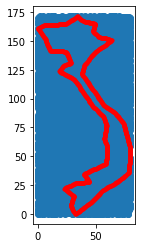

In [30]:
bounds = viet_mesh.bounds
np.random.seed(0)

n_pts = 20000
points = np.random.uniform(
    low=[bounds[0], bounds[2]], 
    high=[bounds[1], bounds[3]],
    size=(n_pts,2)
)

fig, ax = plt.subplots(1)
ax.scatter(points[:,0], points[:,1])
ax.scatter(viet_np[:,0], viet_np[:,1], color='r', s=10)
ax.set_aspect('equal')

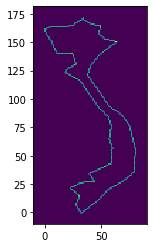

In [31]:
fig, ax = plt.subplots(1)

ax.hist2d(
    viet_np[:,0], 
    viet_np[:,1], 
    bins=[
        int(bounds[1]-bounds[0]), 
        int(bounds[3]-bounds[2])
    ],
    range=(
        (viet_np[:,0].min()-10, viet_np[:,0].max()+10),
        (viet_np[:,1].min()-10, viet_np[:,1].max()+10),
    )
),

ax.set_aspect('equal')

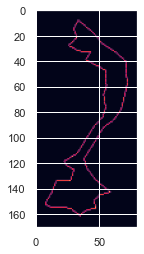

In [127]:
H, xedges, yedges = np.histogram2d(
    viet_np[:,0], 
    viet_np[:,1], 
    bins=[
        int(bounds[1]-bounds[0]), 
        int(bounds[3]-bounds[2])
    ],
    range=(
        (viet_np[:,0].min()-10, viet_np[:,0].max()+10),
        (viet_np[:,1].min()-10, viet_np[:,1].max()+10),
    )
)
H = H.T
# H = np.flip(H, axis=0)


fig, ax = plt.subplots(1)
ax.imshow(H)

# ax.invert_yaxis()

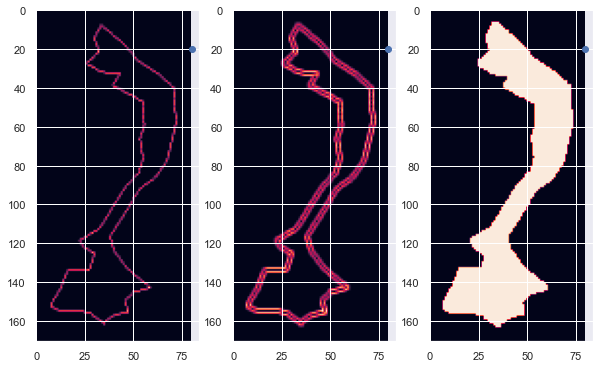

In [131]:
from skimage.segmentation import flood_fill, flood
from skimage import filters

pt = (80, 20)
sobel = filters.sobel(H)
flood = ~flood(sobel, pt, tolerance=0.04).astype(bool)

fig, ax = plt.subplots(1,3, figsize=(10,10))
ax[0].imshow(H)
ax[1].imshow(sobel)
ax[2].imshow(flood)
for i in range(3):
    ax[i].scatter(pt[0], pt[1])
#     ax[i].invert_yaxis()

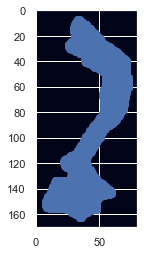

In [132]:
X, Y = np.meshgrid(np.arange(flood.shape[0]), np.arange(flood.shape[1]))
X, Y = X.flatten(), Y.flatten()

p = np.array([[yy,xx] for xx,yy in zip(X,Y) if flood[xx,yy]])
plt.imshow(flood)

plt.scatter(p[:,0], p[:,1])

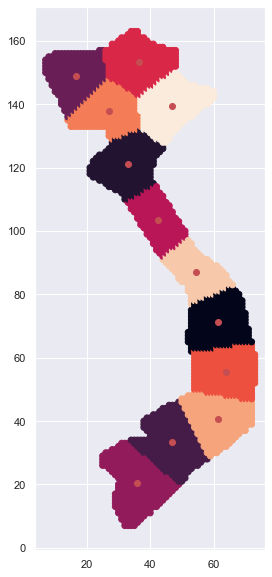

In [133]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=0).fit(p)

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(p[:,0], p[:,1], c=kmeans.predict(p))
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],c='r')
ax.set_aspect('equal')
plt.show()

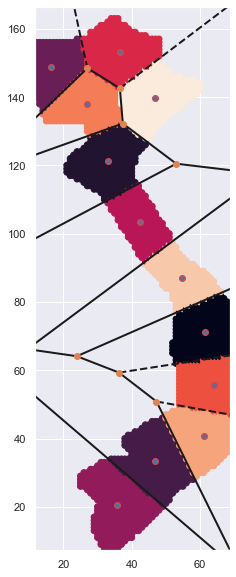

In [134]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(kmeans.cluster_centers_, qhull_options='Qbb Qc Qx')
fig = voronoi_plot_2d(vor, show_vertices=True, line_width=2, )
fig.set_size_inches(10,10)
ax = fig.axes[0]

ax.scatter(p[:,0], p[:,1], c=kmeans.predict(p))
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],c='r')
ax.set_aspect('equal')

plt.show()

In [135]:
vor.ridge_vertices

[[-1, 3],
 [-1, 2],
 [0, 2],
 [0, 4],
 [3, 4],
 [1, 2],
 [-1, 1],
 [0, 6],
 [4, 5],
 [5, 7],
 [6, 7],
 [8, 10],
 [8, 9],
 [9, 11],
 [10, 11],
 [-1, 8],
 [-1, 10],
 [3, 9],
 [5, 11],
 [12, 13],
 [-1, 12],
 [13, 14],
 [-1, 14],
 [1, 12],
 [6, 13],
 [7, 14]]

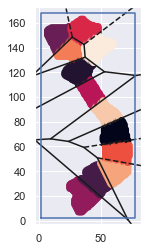

In [137]:
import shapely
import shapely.ops
import shapely.geometry


fig, ax = plt.subplots(1, )

all_lines = []
for simplex in vor.ridge_vertices:
    simplex = np.asarray(simplex)
    if np.all(simplex >= 0):
        ax.plot(vor.vertices[simplex,0], vor.vertices[simplex,1], 'k-')
        all_lines.append([
            vor.vertices[simplex,0],
            vor.vertices[simplex,1]
        ])
        
ptp_bound = vor.points.ptp(axis=0)
center = vor.points.mean(axis=0)
for pointidx, simplex in zip(vor.ridge_points, vor.ridge_vertices):
    simplex = np.asarray(simplex)
    if np.any(simplex < 0):
        i = simplex[simplex >= 0][0]  # finite end Voronoi vertex

        t = vor.points[pointidx[1]] - vor.points[pointidx[0]]  # tangent
        t /= np.linalg.norm(t)
        n = np.array([-t[1], t[0]])  # normal

        midpoint = vor.points[pointidx].mean(axis=0)
        direction = np.sign(np.dot(midpoint - center, n)) * n
        far_point = vor.vertices[i] + direction * ptp_bound.max()

        ax.plot([vor.vertices[i,0], far_point[0]],
                [vor.vertices[i,1], far_point[1]], 'k--')
        
        all_lines.append([
            [vor.vertices[i,0], far_point[0]],
            [vor.vertices[i,1], far_point[1]]
        ])
        
ax.scatter(p[:,0], p[:,1], c=kmeans.predict(p))

ax.set_xlim(p[:,0].min()-10, p[:,0].max()+10)
ax.set_ylim(p[:,1].min()-10, p[:,1].max()+10)
ax.plot(
    [p[:,0].min()-5, p[:,0].min()-5, p[:,0].max()+5, p[:,0].max()+5, p[:,0].min()-5],
    [p[:,1].min()-5, p[:,1].max()+5, p[:,1].max()+5, p[:,1].min()-5, p[:,1].min()-5]
)

all_lines = [shapely.geometry.LineString(zip(x,y)) for x,y in all_lines]
ax.set_aspect('equal')



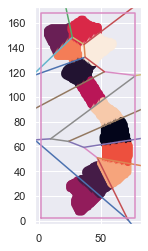

In [139]:
fig, ax = plt.subplots(1)
for line in all_lines:
    x,y = line.xy
    ax.plot(x,y)
    
ax.scatter(p[:,0], p[:,1], c=kmeans.predict(p))
ax.plot(
    [p[:,0].min()-5, p[:,0].min()-5, p[:,0].max()+5, p[:,0].max()+5, p[:,0].min()-5],
    [p[:,1].min()-5, p[:,1].max()+5, p[:,1].max()+5, p[:,1].min()-5, p[:,1].min()-5]
)

region_bbox = shapely.geometry.Polygon(zip(
    [p[:,0].min()-5, p[:,0].min()-5, p[:,0].max()+5, p[:,0].max()+5, p[:,0].min()-5], 
    [p[:,1].min()-5, p[:,1].max()+5, p[:,1].max()+5, p[:,1].min()-5, p[:,1].min()-5]
))

ax.set_xlim(p[:,0].min()-10, p[:,0].max()+10)
ax.set_ylim(p[:,1].min()-10, p[:,1].max()+10)
ax.set_aspect('equal')


plt.show()


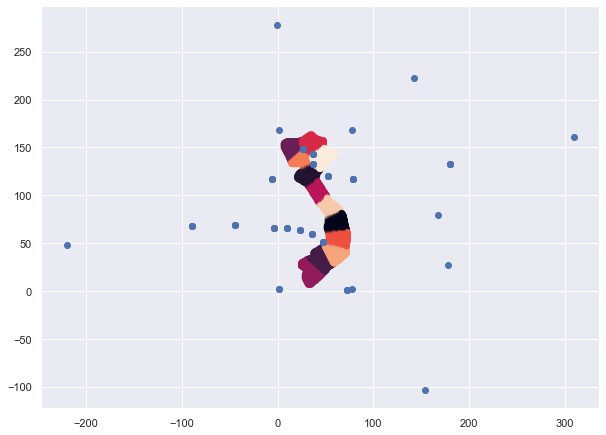

In [141]:
xs = []
ys = []
for line in all_lines:
    x,y = line.xy
    xs.extend(x)
    ys.extend(y)
    
points = list(zip(xs,ys))
x,y = region_bbox.exterior.xy

points.extend(list(zip(x,y)))

points = np.array(points)

fig, ax = plt.subplots(1, figsize=(10,10))
ax.scatter(p[:,0], p[:,1], c=kmeans.predict(p))
ax.scatter(*points.T)
ax.set_aspect('equal')
plt.show()

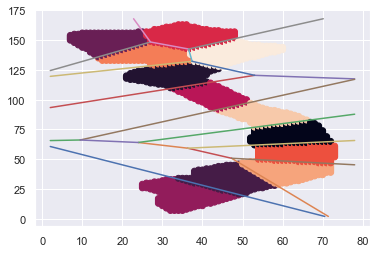

In [142]:
for line in all_lines:
    intersects = region_bbox.intersection(line)
    if intersects:
        x,y = intersects.xy
        plt.plot(x,y)
plt.scatter(p[:,0], p[:,1], c=kmeans.predict(p))



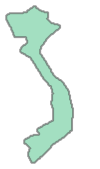

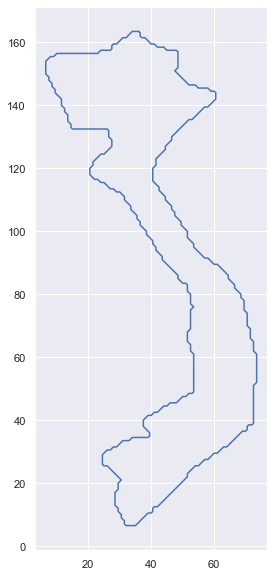

In [143]:
from skimage import measure

fig, ax = plt.subplots(1, figsize=(10,10))
for poly in measure.find_contours(flood):
    poly = np.flip(poly)
    ax.plot(poly[:,0], poly[:,1])
    viet_poly = shapely.geometry.Polygon(poly)

ax.set_aspect('equal')
viet_poly

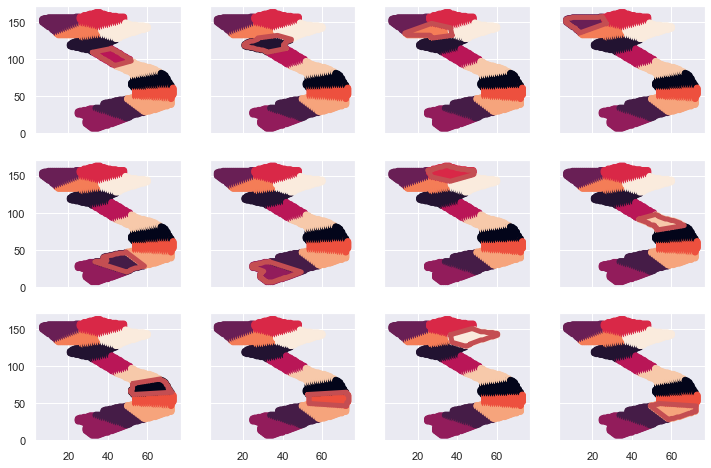

In [144]:
line_split_collection = all_lines.copy()
line_split_collection.append(region_bbox.boundary) # collection of individual linestrings for splitting in a list and add the polygon lines to it.
merged_lines = shapely.ops.linemerge(line_split_collection)
border_lines = shapely.ops.unary_union(merged_lines)
decomposition = shapely.ops.polygonize(border_lines)

fig, ax = plt.subplots(len(kmeans.cluster_centers_[:,0])//4,4, sharex=True, sharey=True, figsize=(12,8))
ax = ax.flatten()

counter = 0
sub_polys = []
for d in decomposition:
    x,y = d.boundary.xy
    if d.intersects(viet_poly):
        sub_poly = d.intersection(viet_poly)
        x,y = sub_poly.boundary.xy
        sub_polys.append(sub_poly)
        ax[counter].scatter(p[:,0], p[:,1], c=kmeans.predict(p))
        ax[counter].plot(x,y, color='r', lw='5')
        counter += 1


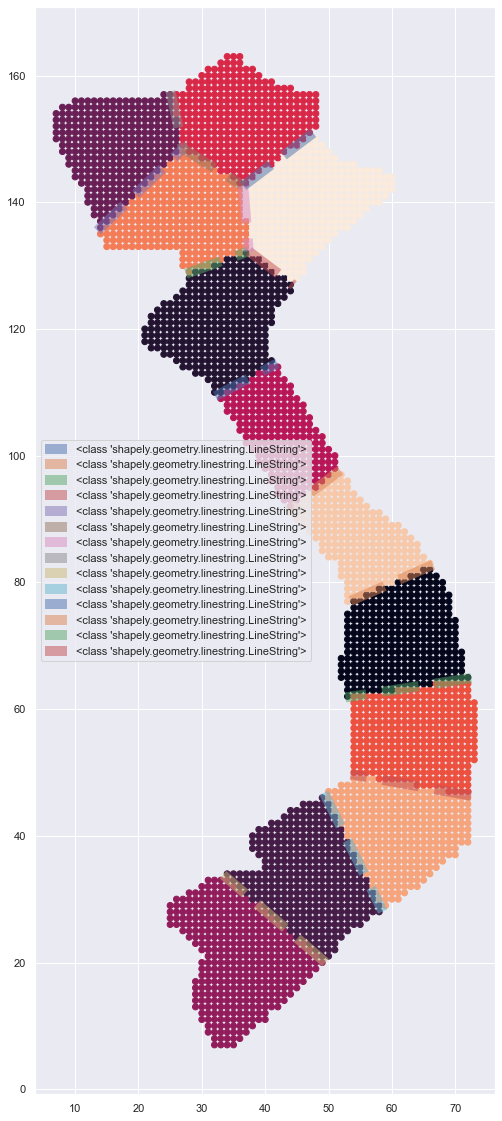

In [145]:
edges = [] 

fig, ax = plt.subplots(1, figsize=(20,20))
for idx, p0 in enumerate(sub_polys):
    for p1 in sub_polys[idx+1:]:
        if p0.intersects(p1):
            edge = p0.intersection(p1)
            edges.append(edge)
            if 'line' in str(type(edge)):
                x,y = edge.xy

            ax.plot(x,y, label=str(type(edge)), alpha=0.5, lw='10', ls='--')

ax.legend()
ax.scatter(p[:,0], p[:,1], c=kmeans.predict(p))
ax.set_aspect('equal')
plt.show()

12 12


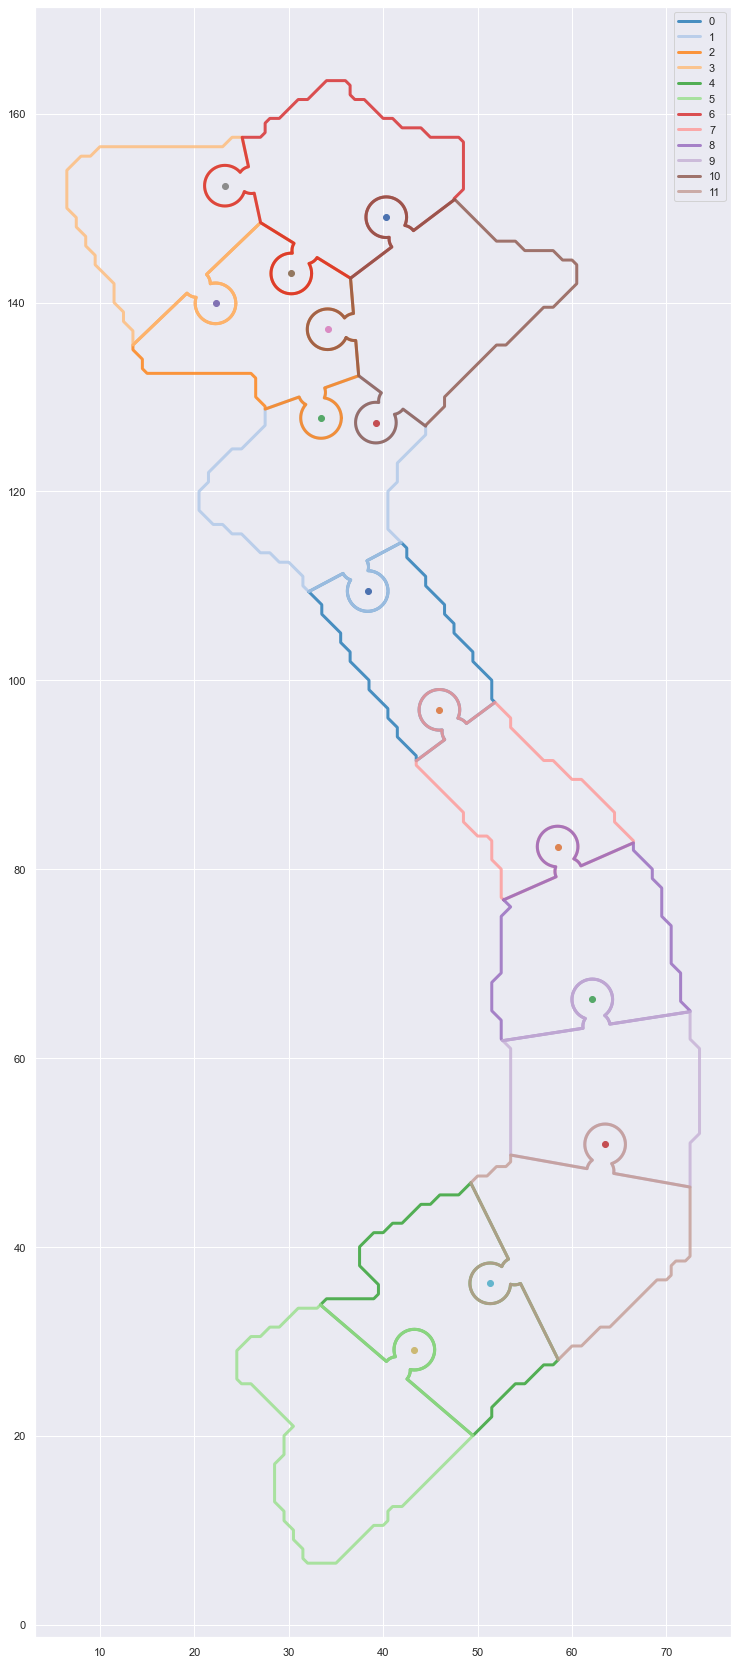

In [146]:
connection_size = np.mean([e.length for e in edges]) * 0.2

fig, ax = plt.subplots(1, figsize=(20, 30))

# ax.scatter(p[:,0], p[:,1], c=kmeans.predict(p))

pieces = sub_polys.copy()

for e in edges:
    mid_point = e.centroid
    
    connection = mid_point.buffer(connection_size * 0.5)
    new_line = shapely.geometry.LineString([mid_point, shapely.geometry.Point(e.boundary[0])])
    offset_line = new_line.parallel_offset(connection_size, 'left')
    offset_point = offset_line.boundary[0]
    
    offset_point_buffer = offset_point.buffer(connection_size*0.75)
    edge_connection = shapely.ops.cascaded_union([connection, offset_point_buffer])
    
    potential_piece_idx = [idx for idx, poly in enumerate(sub_polys) if edge_connection.intersects(poly)]
    sub_piece_idx = [idx for idx, poly in enumerate(sub_polys) if poly.contains(offset_point)][0]
    potential_piece_idx.remove(sub_piece_idx)
    add_piece_idx = potential_piece_idx[0]
    
    ax.scatter(*offset_point.xy)
    pieces[add_piece_idx] = shapely.ops.cascaded_union([pieces[add_piece_idx], edge_connection])
    pieces[sub_piece_idx] = pieces[sub_piece_idx].difference(edge_connection)
    
#     pieces[piece_area[0][0]] = potential_piece[0][1]
#     pieces[piece_area[1][0]] = pieces[piece_area[1][0]].difference(edge_connection)
    
#     x, y = edge_connection.boundary.xy
#     ax.plot(x, y)
    

ax.set_aspect('equal')

import seaborn as sns
sns.set()
colors = sns.color_palette("tab20", len(pieces))

for idx, piece in enumerate(pieces):
    x, y = piece.boundary.xy
    ax.plot(x, y, label=f'{idx}', lw=3, c=colors[idx], alpha=0.8)

print(len(pieces), len(sub_polys))
    
# for idx, piece in enumerate(sub_polys):
#     x, y = piece.boundary.xy
#     ax.plot(x, y, label=f'{idx}', lw=3, c=colors[idx], alpha=0.6, ls=':')
#     ax.scatter(*piece.centroid.xy, label=f'{idx}', marker='x', s=400, c=[colors[idx]])


    
ax.legend()
plt.show()

[0.0, 80.0, -1.4432899320127035e-15, 171.4871826171875, 0.0, 14.455632209777832]


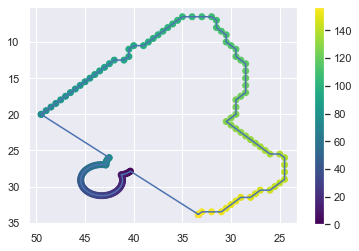

In [190]:
print(viet_mesh.bounds)
x,y = pieces[5].boundary.xy
x.append(x[0])
y.append(y[0])
# x = np.roll(x, 60)
# y = np.roll(y, 60)

z_low = np.full(len(x), viet_mesh.bounds[4]-1)
z_high = np.full(len(x), viet_mesh.bounds[5]+1)

piece = np.zeros(shape=(2*len(x),3))
piece[:,0], piece[:,1] = np.hstack([x,x]), np.hstack([y,y])
piece[:,2] = np.hstack([z_low, z_high])

piece_lines = [[2,i,i+1] for i in range(len(x)-1)]
piece_lines.extend([[2,len(x)+i,len(x)+i+1] for i in range(len(x)-1)])
piece_lines.extend([[2,i,i+len(x)] for i in range(len(x))])

top_face = [len(x)]
top_face.extend(list(range(len(x))))
bot_face = [len(x)]
bot_face.extend(list(range(len(x), 2*len(x))))

side_faces = [[4,idx,idx+1,idx+len(x)+1,idx+len(x)] for idx in range(len(x)-1)]
side_faces.append([4,0,len(x)-1,2*len(x)-1,len(x)])
side_faces = np.vstack(side_faces)

faces = np.hstack([top_face, bot_face])
faces = np.append(faces, side_faces)

fig, ax = plt.subplots(1)
ax.plot(x,y)
p = ax.scatter(x,y, c=list(range(len(x))), cmap='viridis')
fig.colorbar(p, ax=ax)
ax.invert_xaxis()
ax.invert_yaxis()

plt.show()

In [191]:
print(faces)
print(faces.shape)

[158   0   1 ... 157 315 158]
(1108,)


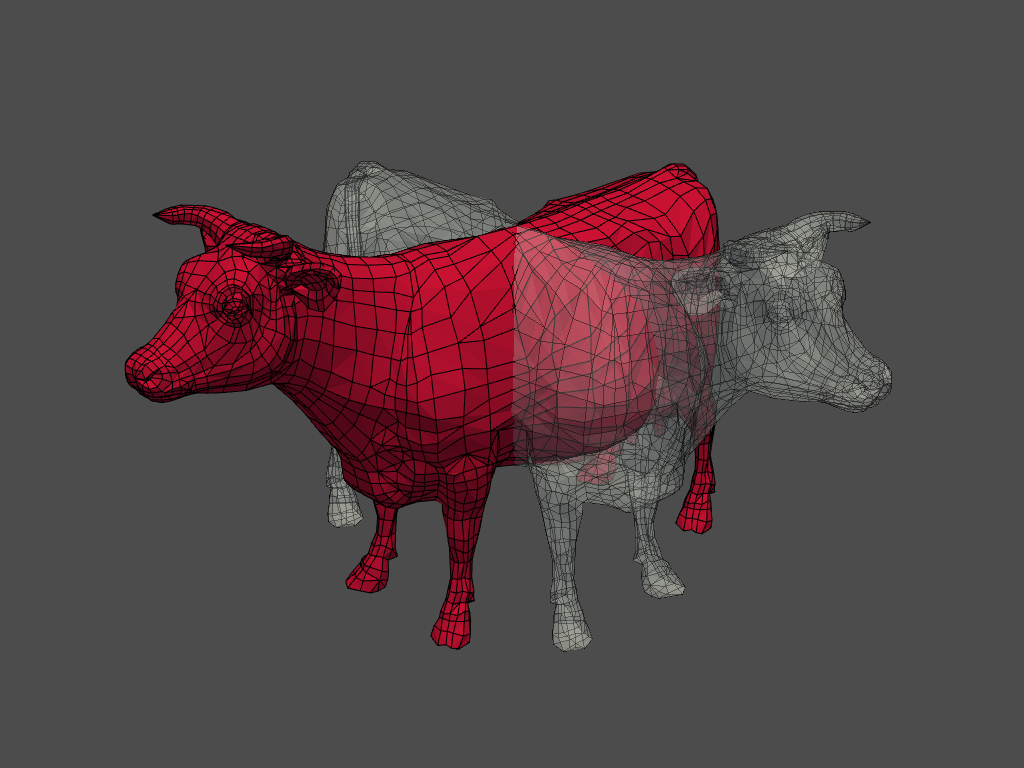

PolyData (0x1fa3c66a0)
  N Cells:	3263
  N Points:	2903
  X Bounds:	-4.446e+00, 5.998e+00
  Y Bounds:	-3.637e+00, 2.760e+00
  Z Bounds:	-1.701e+00, 1.701e+00
  N Arrays:	0

<class 'pyvista.core.pointset.PolyData'>


In [192]:
# sphinx_gallery_thumbnail_number = 2
import pyvista as pv
from pyvista import examples

mesh = examples.download_cow()

cpos = [(13.0, 7.6, -13.85), (0.44, -0.4, -0.37), (-0.28, 0.9, 0.3)]

dargs = dict(show_edges=True)
# Rotate the mesh to have a second mesh
rot = mesh.copy()
rot.rotate_y(90)

p = pv.Plotter()
p.add_mesh(mesh, color="Crimson", **dargs)
p.add_mesh(rot, color="mintcream", opacity=0.35, **dargs)
p.camera_position = cpos
p.show()

print(mesh)
print(type(mesh))

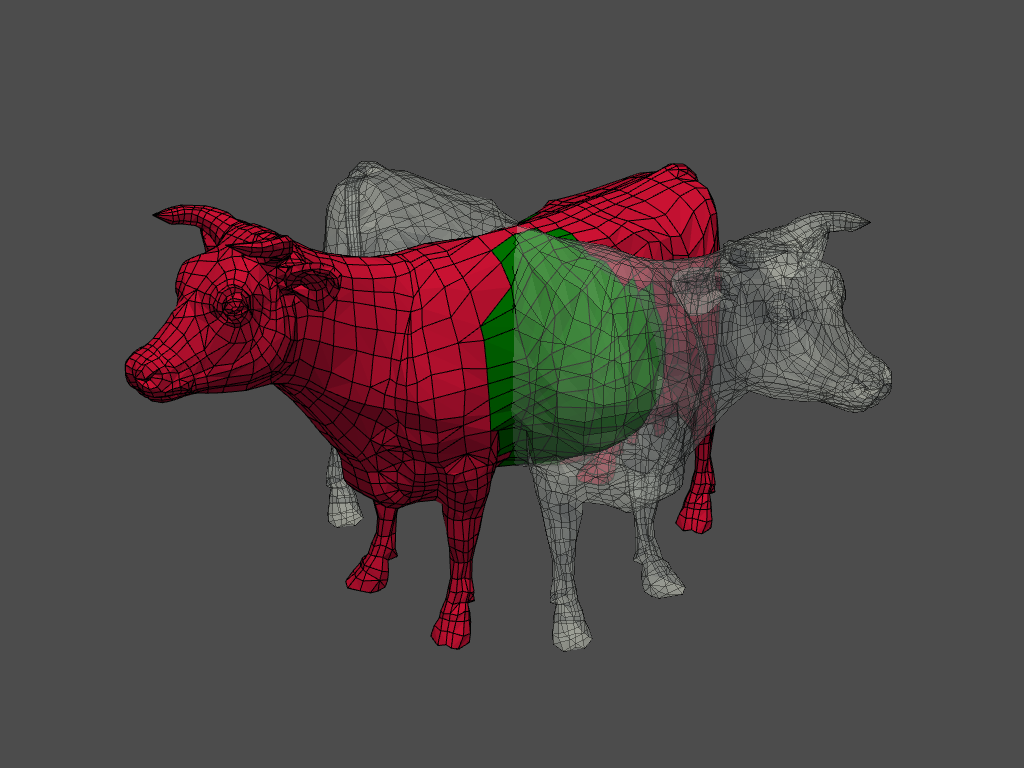

[(13.0, 7.6, -13.85),
 (0.44, -0.4, -0.37),
 (-0.2830738875949229, 0.9098803529836806, 0.3032934509945602)]

In [193]:
select = mesh.select_enclosed_points(rot)

inside = select.threshold(0.5)
outside = select.threshold(0.5, invert=True)
p = pv.Plotter()
p.add_mesh(outside, color="Crimson", **dargs)
p.add_mesh(inside, color="green", **dargs)
p.add_mesh(rot, color="mintcream", opacity=0.35, **dargs)

p.camera_position = cpos
p.show()

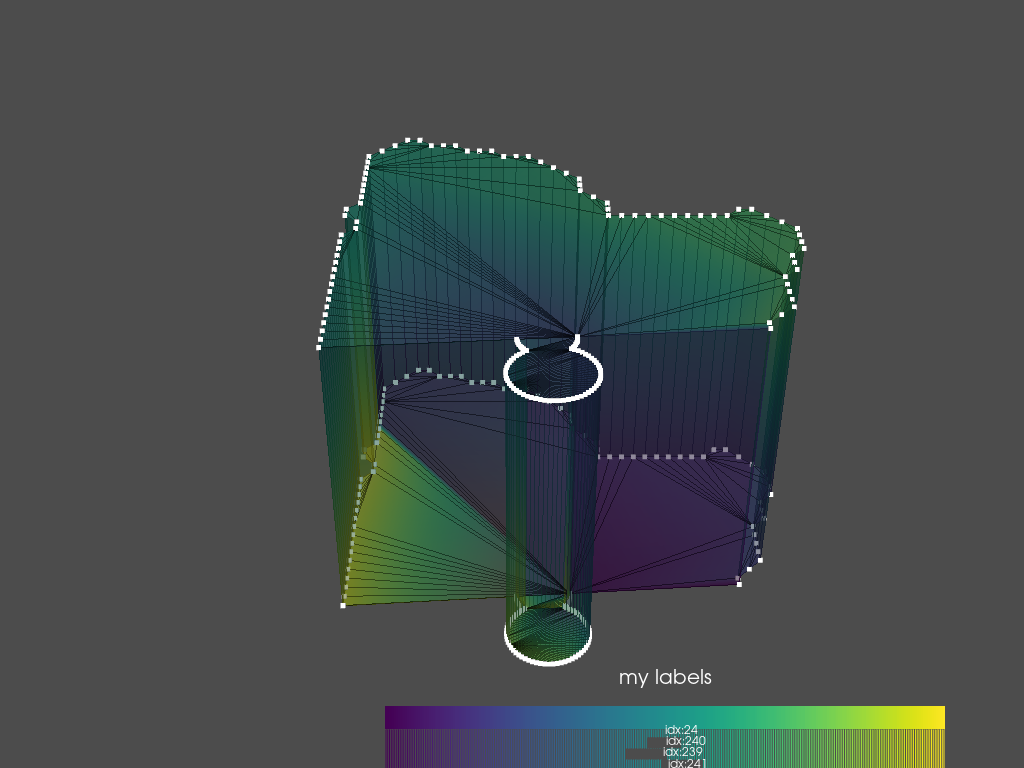

[(82.24017497292284, 65.4117133436867, 52.46167599239213),
 (37.00631508541963, 20.177853456183488, 7.227816104888916),
 (0.0, 0.0, 1.0)]

In [194]:
data = pv.PolyData(piece, faces)
data['my labels'] = [f"idx:{i}" for i in range(data.n_points)]
data.lines = piece_lines
data = data.clip_surface(data)

# from pyvistaqt import BackgroundPlotter
# print(data.lines)
# p = BackgroundPlotter()
p = pv.Plotter()
p.add_mesh(data, opacity=0.5, show_edges=True)
# p.add_mesh(data.delaunay_2d(edge_source=bot_face_poly))
p.add_point_labels(data, "my labels", point_size=5, font_size=12)
# p.add_mesh(viet_mesh)
p.show()
# # data.plot(show_edges=True, color=True, opacity=0.5, notebook=False)



In [195]:
data.plot(notebook=False, opacity=0.5, show_edges=True)

[(82.24017497292284, 65.4117133436867, 52.46167599239213),
 (37.00631508541963, 20.177853456183488, 7.227816104888916),
 (0.0, 0.0, 1.0)]

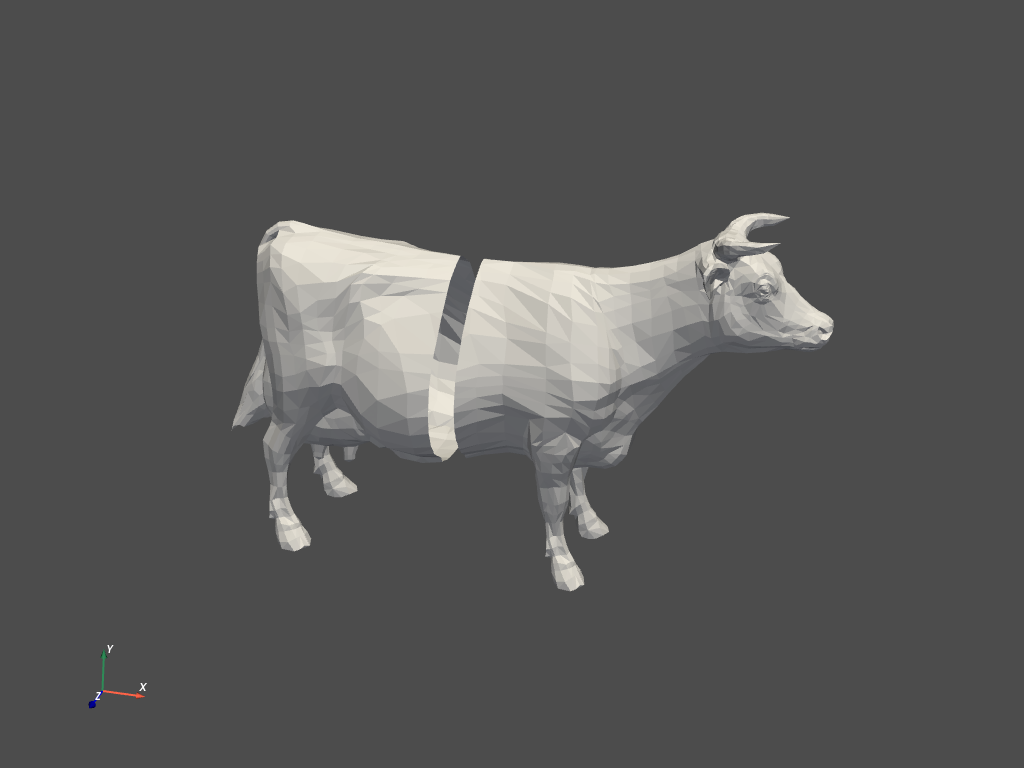

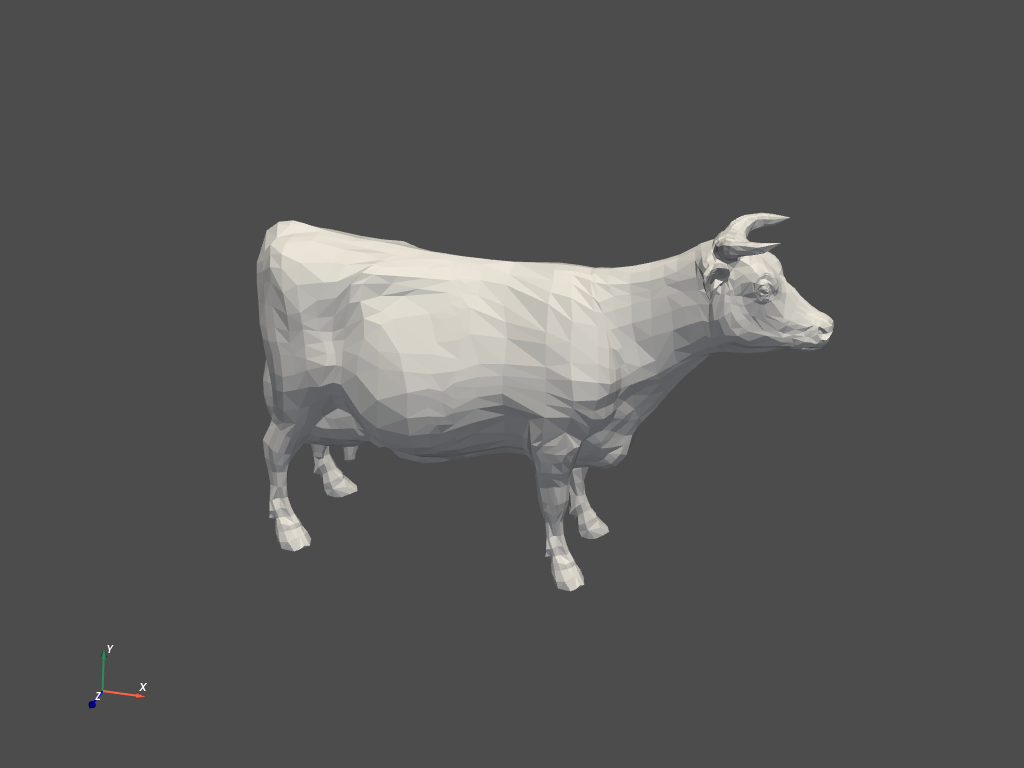

<class 'pyvista.core.pointset.PolyData'>


In [196]:
import pymeshfix

cow = examples.download_cow()

# Split the cow and cast to PolyData
split_cow = cow.clip_box([-0.2,0.2,-4,3, -2, 2]).extract_geometry()

cpos= [(6.56, 8.73, 22.03),
 (0.77, -0.44, 0.0),
 (-0.13, 0.93, -0.35)]

split_cow.plot(cpos=cpos)
fixer = pymeshfix.MeshFix(split_cow)
fixer.repair(joincomp=True, remove_smallest_components=False)
fixer.mesh.plot(cpos=cpos)
print(type(fixer.mesh))

In [197]:
fixer = pymeshfix.MeshFix(data)
fixer.repair(joincomp=True, remove_smallest_components=False)

fixer.mesh.plot(notebook=False, opacity=0.5, show_edges=True)

[(82.24017497292284, 65.4117133436867, 52.46167599239213),
 (37.00631508541963, 20.177853456183488, 7.227816104888916),
 (0.0, 0.0, 1.0)]

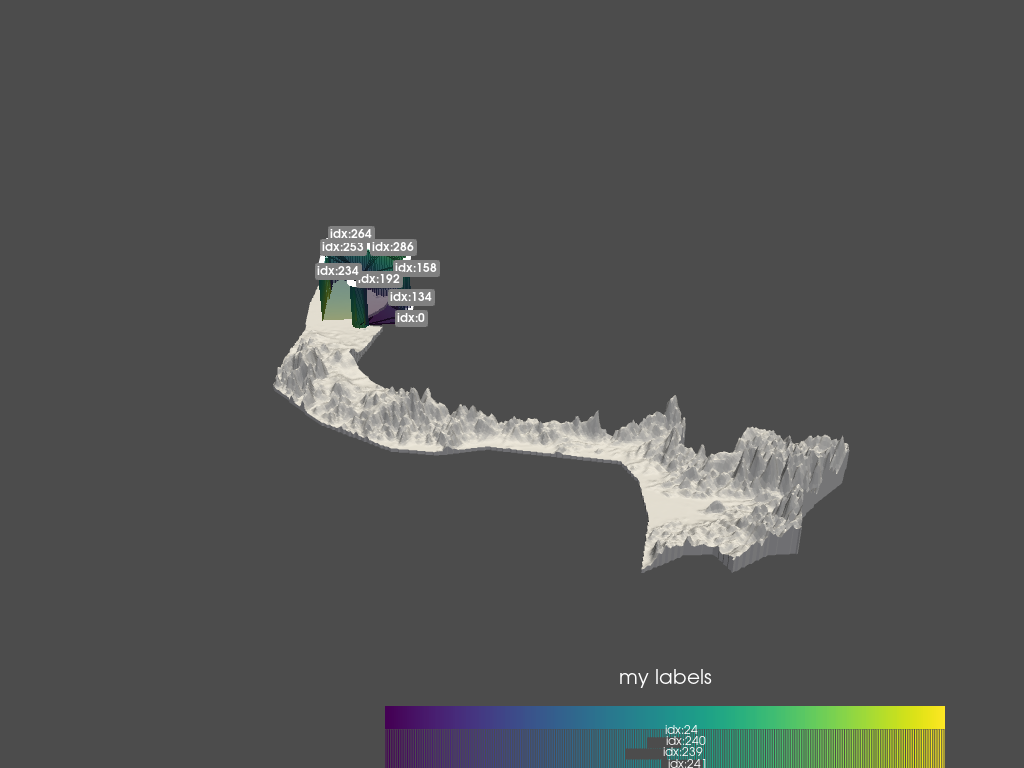

[(251.8547644369714, 297.5983557455652, 219.08258054186032),
 (40.0, 85.74359130859375, 7.227816104888916),
 (0.0, 0.0, 1.0)]

In [198]:
p = pv.Plotter()
p.add_mesh(data, opacity=0.5, show_edges=True)
# p.add_mesh(data.delaunay_2d(edge_source=bot_face_poly))
p.add_point_labels(data, "my labels", point_size=5, font_size=12)
p.add_mesh(viet_mesh)
p.show()

